# Simulator PV Tricahue_II

- Author: Victor Muñoz
- Collaborator: Nicolás Otárola
- Pvlib_version: 0.9.0
- Date : 14-02-2022 

In [29]:
# data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Photovoltaic systems
import pvlib
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain

# paths
file_path_gen = '../../Data/Real_Generations_Data/'
file_path_solcast = '../../Data/Solcast_Data/'
file_path_func = '../../Functions/'

# functions AND system photovoltaic
import sys
sys.path.append(file_path_gen)
sys.path.append(file_path_solcast)
sys.path.append(file_path_func)

import functions as func
import Tricahue_II_config as pv

import imp
imp.reload(pv)
imp.reload(func)

# save graphics
%matplotlib inline
%matplotlib notebook

#new library
from pvlib.pvsystem import FixedMount
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

import bokeh as boken
import bokeh.palettes as bkpalet #from bokeh.palettes import PuOr
import bokeh.transform as bktrans # from bokeh.transform import cumsums

In [2]:
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

## 1) Location , Module, Inverter, System and Model

In [3]:
#Location
loc = Location(latitude=pv.Location['lat'],
               longitude=pv.Location['long'],
               tz=pv.Location['tz'],
               altitude=pv.Location['alt'])

In [4]:
#module
module_310 = pd.Series(pv.JAM60S01_310,
                       name=pv.JAM60S01_310['Name'])

In [5]:
#inverter
inverter_800 = pd.Series(pv.SMA_America__SC800CP,
                            name=pv.SMA_America__SC800CP['Name'])

In [6]:
#System
system_A = PVSystem(module_parameters=module_310,
                    inverter_parameters=inverter_800,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    temperature_model_parameters=temperature_model_parameters,
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i']
                   )

system_B = PVSystem(module_parameters=module_310,
                    inverter_parameters=inverter_800,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    temperature_model_parameters=temperature_model_parameters,
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i']
                   )

system_C = PVSystem(module_parameters=module_310,
                    inverter_parameters=inverter_800,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    temperature_model_parameters=temperature_model_parameters,
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i']
                   )


In [7]:
#model
mc_A = ModelChain(system_A, 
                  loc, 
                  aoi_model= 'physical' ,       # physical, no_loss
                  spectral_model="no_loss",    # no_loss
                  dc_model='pvwatts',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  #temp_model='sapm',           # sapm
                  #losses_model="pvwatts",     # pvwatts
                  name="system_A")             # system_A

mc_B = ModelChain(system_B, 
                  loc, 
                  aoi_model= 'physical' ,       # physical, no_loss
                  spectral_model="no_loss",    # no_loss
                  dc_model='pvwatts',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  #temp_model='sapm',           # sapm
                  #losses_model="pvwatts",     # pvwatts
                  name="system_B")             # system_B

mc_C = ModelChain(system_C, 
                  loc, 
                  aoi_model= 'physical' ,       # physical, no_loss
                  spectral_model="no_loss",    # no_loss
                  dc_model='pvwatts',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  #temp_model='sapm',           # sapm
                  #losses_model="pvwatts",     # pvwatts
                  name="system_C")             # system_C



## 2) Data Weather Solcast and Generacion solar

In [8]:
# Weather Solcast
name_csv = 'tricahue_II.csv'
solcast = func.weather_solcast_2(file_path_solcast+name_csv)
weather_columns = ['ghi','dni','dhi','temp_air', 'wind_speed','ebh','azimuth','cloud_opacity','zenith']
print(len(solcast))

times, weather = func.get_times_weather(solcast,loc,weather_columns)

#para que conincidan los largos
#to-do: automatizacion/refactoring

#print(len(times[1175:-23]))
#print(times[1175:-23])

#print(len(weather[1175:-23]))
#print(weather[1075:-23])

#times = times[1175:-23]
#weather = weather[1175:-23]

20592
primer dia 2019-08-27 00:00:00
ultimo dia 2021-12-31 23:00:00
t: DatetimeIndex(['2019-08-27 00:00:00', '2019-08-27 01:00:00',
               '2019-08-27 02:00:00', '2019-08-27 03:00:00',
               '2019-08-27 04:00:00', '2019-08-27 05:00:00',
               '2019-08-27 06:00:00', '2019-08-27 07:00:00',
               '2019-08-27 08:00:00', '2019-08-27 09:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', length=20592, freq='H')
t: 20592
s 20592
w 20592
w 20592
                 utc_time             DateStart Periodo  temp_air  azimuth  \
0     2019-08-27 00:00:00  2019-08-26T23:00:00Z   PT60M      12.8       87   
1     2019-08-27 01:00:00  2019-08-27T00:00:00Z 

In [9]:
# read pickle
file_name = 'Real_Generations'
file_ext = 'xlsx'
data_pickle = func.data_to_pickle(file_path_gen,file_name,file_ext)

Pickle found in: ../../Data/Real_Generations_Data/Real_Generations.pickle
Returning data


In [10]:
# names to seach
names_pv = ['PMGD PFV TRICAHUE II']

In [11]:
# find hourly logs for each name
data_hours = func.filter_hour_from_dataFrame(data=data_pickle,
                                      #columns_names=[],
                                      #column_fecha='Fecha'
                                      #column_central='Central',
                                      #first_year=2021,
                                      #last_year=2021,
                                      names_pv=names_pv,
                                      #months=[7,8,9,10,11,12],
                                      multi = 1000,
                                      p = False)

- Using default  ['Hora 1', 'Hora 2', 'Hora 3', 'Hora 4', 'Hora 5', 'Hora 6', 'Hora 7', 'Hora 8', 'Hora 9', 'Hora 10', 'Hora 11', 'Hora 12', 'Hora 13', 'Hora 14', 'Hora 15', 'Hora 16', 'Hora 17', 'Hora 18', 'Hora 19', 'Hora 20', 'Hora 21', 'Hora 22', 'Hora 23', 'Hora 24'] for columns_names 

- Using default Fecha for column_fecha 

- Using default Central for column_central 

- Using default 0 for first_year 

- Using default 10000 for last_year 



PMGD PFV TRICAHUE II len: 20592


<IPython.core.display.Javascript object>


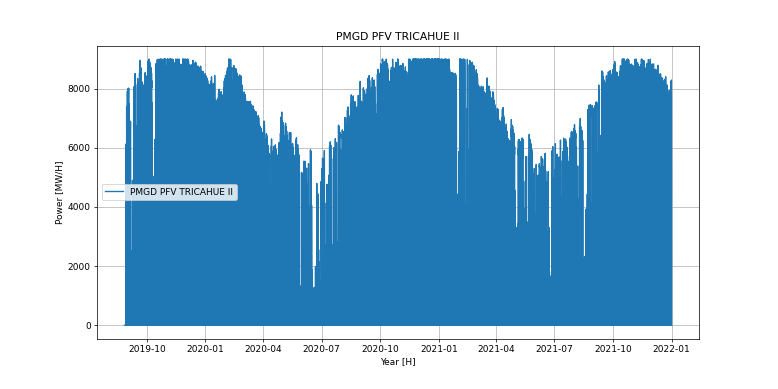

In [12]:
func.graph(data=data_hours,
           x_label= 'Year [H]',
           y_label='Power [MW/H]',
           name='hour')

In [13]:
# find daily logs for each name
data_days = func.filter_day_from_dataFrame(data=data_pickle,
                                      #column_fecha='Fecha'
                                      #column_total='Total'
                                      #column_central='Central',
                                      #first_year=2021,
                                      #last_year=2021,
                                      names_pv=names_pv,
                                      #months=[7,8,9,10,11,12],
                                      multi = 1000,
                                      p = False)

- Using default Fecha for column_fecha 

- Using default Total for column_total 

- Using default Central for column_central 

- Using default 0 for first_year 

- Using default 10000 for last_year 



In [14]:
pp = 0
for i in data_days[names_pv[0]]:
    print(pp,i,data_days[names_pv[0]][i])
    pp = pp + 1

0 2019-08-27 00:00:00 0.0
1 2019-08-28 00:00:00 2.0266162999999997
2 2019-08-29 00:00:00 30566.165412299997
3 2019-08-30 00:00:00 58627.5787081
4 2019-08-31 00:00:00 61114.6738932
5 2019-09-01 00:00:00 68523.78552260001
6 2019-09-02 00:00:00 66503.1793081
7 2019-09-03 00:00:00 59402.28946909999
8 2019-09-04 00:00:00 33623.4810514
9 2019-09-05 00:00:00 39657.6397863
10 2019-09-06 00:00:00 13882.017320699999
11 2019-09-07 00:00:00 8110.412110200001
12 2019-09-08 00:00:00 29613.23482229999
13 2019-09-09 00:00:00 21312.4636201
14 2019-09-10 00:00:00 51245.55085950001
15 2019-09-11 00:00:00 61435.44710310001
16 2019-09-12 00:00:00 71625.8522762
17 2019-09-13 00:00:00 68598.76738850001
18 2019-09-14 00:00:00 13654.1763607
19 2019-09-15 00:00:00 36624.9193905
20 2019-09-16 00:00:00 58723.1034319
21 2019-09-17 00:00:00 71312.22549599998
22 2019-09-18 00:00:00 73112.87245360001
23 2019-09-19 00:00:00 57407.635544100005
24 2019-09-20 00:00:00 83155.6701634
25 2019-09-21 00:00:00 81598.9002374
26

356 2020-08-17 00:00:00 59992.1615949
357 2020-08-18 00:00:00 22946.2206486
358 2020-08-19 00:00:00 57129.4407333
359 2020-08-20 00:00:00 62787.16549380001
360 2020-08-21 00:00:00 62912.8903919
361 2020-08-22 00:00:00 62796.13077209999
362 2020-08-23 00:00:00 43941.45477339999
363 2020-08-24 00:00:00 43705.6115506
364 2020-08-25 00:00:00 45007.2995276
365 2020-08-26 00:00:00 39915.6536275
366 2020-08-27 00:00:00 59777.73500379999
367 2020-08-28 00:00:00 23129.688795
368 2020-08-29 00:00:00 67431.30757450001
369 2020-08-30 00:00:00 56367.420081400014
370 2020-08-31 00:00:00 51443.6063328
371 2020-09-01 00:00:00 11013.396907100001
372 2020-09-02 00:00:00 63741.9226849
373 2020-09-03 00:00:00 63840.349491
374 2020-09-04 00:00:00 44422.149342799996
375 2020-09-05 00:00:00 39899.3334113
376 2020-09-06 00:00:00 67483.1313897
377 2020-09-07 00:00:00 65196.2257925
378 2020-09-08 00:00:00 9147.557291600002
379 2020-09-09 00:00:00 70781.9405742
380 2020-09-10 00:00:00 69608.0785934
381 2020-09-1

605 2021-04-23 00:00:00 9038.6307249
606 2021-04-24 00:00:00 56641.393781
607 2021-04-25 00:00:00 56341.475679899995
608 2021-04-26 00:00:00 55314.538403099985
609 2021-04-27 00:00:00 52893.8815025
610 2021-04-28 00:00:00 52270.8795431
611 2021-04-29 00:00:00 48959.64547959999
612 2021-04-30 00:00:00 19791.3162141
613 2021-05-01 00:00:00 8495.0475059
614 2021-05-02 00:00:00 14937.372570000001
615 2021-05-03 00:00:00 18924.971578200002
616 2021-05-04 00:00:00 23025.6608133
617 2021-05-05 00:00:00 48847.43704389999
618 2021-05-06 00:00:00 50525.3127455
619 2021-05-07 00:00:00 28147.951177900002
620 2021-05-08 00:00:00 21556.6425501
621 2021-05-09 00:00:00 45667.556355099994
622 2021-05-10 00:00:00 46056.5142424
623 2021-05-11 00:00:00 49253.63998180001
624 2021-05-12 00:00:00 47959.490920000004
625 2021-05-13 00:00:00 22442.9675575
626 2021-05-14 00:00:00 19815.000523799998
627 2021-05-15 00:00:00 16785.860578699998
628 2021-05-16 00:00:00 31603.4867309
629 2021-05-17 00:00:00 34541.6565

In [15]:
#c = []
#for i in data_days[names_pv[0]]:
#    c.append(i)
#    
#for i in range(43):
#    print(data_days[names_pv[0]].pop(c[i]))

In [16]:
pp = 0
for i in data_days[names_pv[0]]:
    print(pp,i,data_days[names_pv[0]][i])
    pp = pp + 1

0 2019-08-27 00:00:00 0.0
1 2019-08-28 00:00:00 2.0266162999999997
2 2019-08-29 00:00:00 30566.165412299997
3 2019-08-30 00:00:00 58627.5787081
4 2019-08-31 00:00:00 61114.6738932
5 2019-09-01 00:00:00 68523.78552260001
6 2019-09-02 00:00:00 66503.1793081
7 2019-09-03 00:00:00 59402.28946909999
8 2019-09-04 00:00:00 33623.4810514
9 2019-09-05 00:00:00 39657.6397863
10 2019-09-06 00:00:00 13882.017320699999
11 2019-09-07 00:00:00 8110.412110200001
12 2019-09-08 00:00:00 29613.23482229999
13 2019-09-09 00:00:00 21312.4636201
14 2019-09-10 00:00:00 51245.55085950001
15 2019-09-11 00:00:00 61435.44710310001
16 2019-09-12 00:00:00 71625.8522762
17 2019-09-13 00:00:00 68598.76738850001
18 2019-09-14 00:00:00 13654.1763607
19 2019-09-15 00:00:00 36624.9193905
20 2019-09-16 00:00:00 58723.1034319
21 2019-09-17 00:00:00 71312.22549599998
22 2019-09-18 00:00:00 73112.87245360001
23 2019-09-19 00:00:00 57407.635544100005
24 2019-09-20 00:00:00 83155.6701634
25 2019-09-21 00:00:00 81598.9002374
26

409 2020-10-09 00:00:00 88714.49193250001
410 2020-10-10 00:00:00 90064.0262158
411 2020-10-11 00:00:00 87776.1270151
412 2020-10-12 00:00:00 86907.30879970001
413 2020-10-13 00:00:00 80988.1494878
414 2020-10-14 00:00:00 52481.0990279
415 2020-10-15 00:00:00 81711.1542756
416 2020-10-16 00:00:00 36662.854232900005
417 2020-10-17 00:00:00 71221.752988
418 2020-10-18 00:00:00 66243.30497540001
419 2020-10-19 00:00:00 59525.5561777
420 2020-10-20 00:00:00 91250.7867163
421 2020-10-21 00:00:00 88634.4041706
422 2020-10-22 00:00:00 89988.6939847
423 2020-10-23 00:00:00 88978.1301139
424 2020-10-24 00:00:00 80160.05982529999
425 2020-10-25 00:00:00 56393.3236635
426 2020-10-26 00:00:00 89270.0587289
427 2020-10-27 00:00:00 18948.822597100003
428 2020-10-28 00:00:00 95114.44665819999
429 2020-10-29 00:00:00 93563.80533539999
430 2020-10-30 00:00:00 91367.2101135
431 2020-10-31 00:00:00 91419.50745180002
432 2020-11-01 00:00:00 68432.1434189
433 2020-11-02 00:00:00 92538.1606007
434 2020-11-0

742 2021-09-07 00:00:00 31049.20818819999
743 2021-09-08 00:00:00 73823.44145619997
744 2021-09-09 00:00:00 71727.4201603
745 2021-09-10 00:00:00 42184.887401100015
746 2021-09-11 00:00:00 10360.1357919
747 2021-09-12 00:00:00 26024.9551255
748 2021-09-13 00:00:00 46538.5851974
749 2021-09-14 00:00:00 78958.3377682
750 2021-09-15 00:00:00 76996.0169397
751 2021-09-16 00:00:00 77980.72744650001
752 2021-09-17 00:00:00 74575.74891430001
753 2021-09-18 00:00:00 59090.418679400005
754 2021-09-19 00:00:00 48864.11270819999
755 2021-09-20 00:00:00 77143.8049275
756 2021-09-21 00:00:00 74337.8630249
757 2021-09-22 00:00:00 59133.06018829999
758 2021-09-23 00:00:00 81697.4030991
759 2021-09-24 00:00:00 79542.77637409998
760 2021-09-25 00:00:00 40562.134280000006
761 2021-09-26 00:00:00 80422.75431540002
762 2021-09-27 00:00:00 81071.5081761
763 2021-09-28 00:00:00 80261.6474995
764 2021-09-29 00:00:00 40065.806140600005
765 2021-09-30 00:00:00 83852.0265148
766 2021-10-01 00:00:00 82460.260856

PMGD PFV TRICAHUE II len: 858


<IPython.core.display.Javascript object>


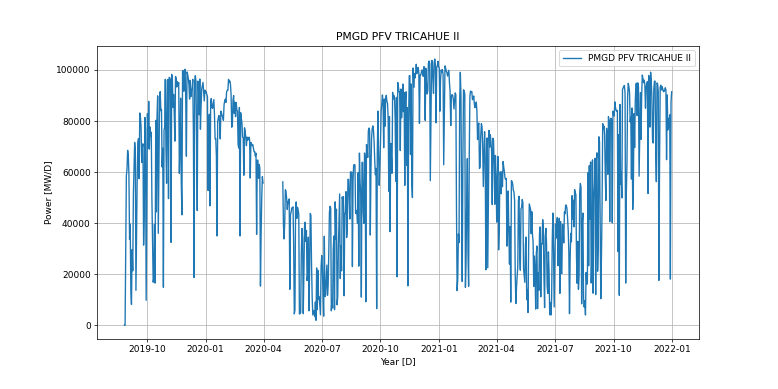

In [17]:
func.graph(data=data_days,
           x_label= 'Year [D]',
           y_label='Power [MW/D]',
           name='days')

In [18]:
data = data_days[names_pv[0]].values()
len(data)

858

## 3) Simulate

In [19]:
# Run model
#weather = pd.DataFrame([[1050,1000,100,30,5]],
#                      columns = ['ghi','dni','dhi','temp_air','wind_speed'],
#                      index=[pd.Timestamp('20170401 1200', tz='US/Arizona')])
mc_A.run_model(weather=weather)
mc_B.run_model(weather=weather)
mc_C.run_model(weather=weather)



ModelChain: 
  name: system_C
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: pvwatts_dc
  ac_model: pvwatts_inverter
  aoi_model: physical_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

## 4) Graphics

/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)
/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)
/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)


<IPython.core.display.Javascript object>


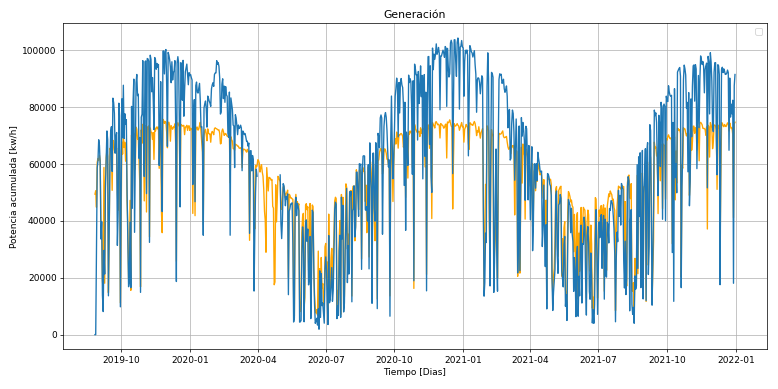

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [26]:
x_d ,y_d_a = func.get_daily_axes_from_modelChain_object(mc_A, 'System_A')
_ ,y_d_b = func.get_daily_axes_from_modelChain_object(mc_B, 'System_B')
_ ,y_d_c = func.get_daily_axes_from_modelChain_object(mc_C, 'System_C')


y_d = [(a+b+c)/1000 for a,b,c in zip(y_d_a,y_d_b,y_d_c)]
func.plot_2(x=x_d,
          y=y_d,
          y2=data,
          size=(12,6),
          save='si',
          name_file='TRICAHUE_II_dias',
          color='orange',
          title='Generación',
          x_label='Tiempo [Dias]',
          y_label='Potencia acumulada [kw/h]')

In [21]:
len(data_days[names_pv[0]].values())

858

In [22]:
len(y_d)

858

In [23]:
hh = 0
for i in x_d:
    print(hh,i)
    hh = hh+1

0 2019-08-27
1 2019-08-28
2 2019-08-29
3 2019-08-30
4 2019-08-31
5 2019-09-01
6 2019-09-02
7 2019-09-03
8 2019-09-04
9 2019-09-05
10 2019-09-06
11 2019-09-07
12 2019-09-08
13 2019-09-09
14 2019-09-10
15 2019-09-11
16 2019-09-12
17 2019-09-13
18 2019-09-14
19 2019-09-15
20 2019-09-16
21 2019-09-17
22 2019-09-18
23 2019-09-19
24 2019-09-20
25 2019-09-21
26 2019-09-22
27 2019-09-23
28 2019-09-24
29 2019-09-25
30 2019-09-26
31 2019-09-27
32 2019-09-28
33 2019-09-29
34 2019-09-30
35 2019-10-01
36 2019-10-02
37 2019-10-03
38 2019-10-04
39 2019-10-05
40 2019-10-06
41 2019-10-07
42 2019-10-08
43 2019-10-09
44 2019-10-10
45 2019-10-11
46 2019-10-12
47 2019-10-13
48 2019-10-14
49 2019-10-15
50 2019-10-16
51 2019-10-17
52 2019-10-18
53 2019-10-19
54 2019-10-20
55 2019-10-21
56 2019-10-22
57 2019-10-23
58 2019-10-24
59 2019-10-25
60 2019-10-26
61 2019-10-27
62 2019-10-28
63 2019-10-29
64 2019-10-30
65 2019-10-31
66 2019-11-01
67 2019-11-02
68 2019-11-03
69 2019-11-04
70 2019-11-05
71 2019-11-06
72

/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)
/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)
/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)


<IPython.core.display.Javascript object>


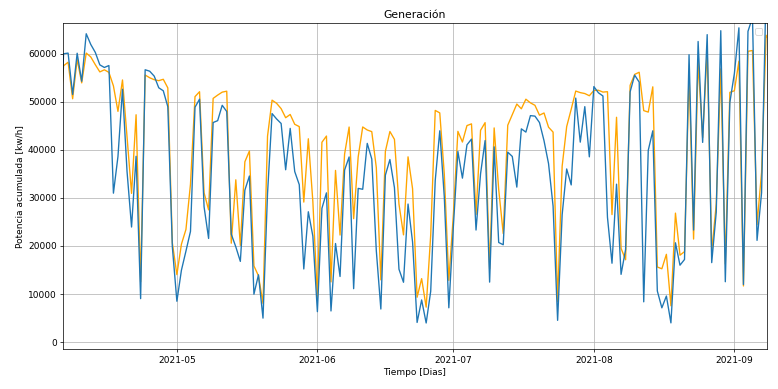

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [30]:
x_d ,y_d_a = func.get_daily_axes_from_modelChain_object(mc_A, 'System_A')
_ ,y_d_b = func.get_daily_axes_from_modelChain_object(mc_B, 'System_B')
_ ,y_d_c = func.get_daily_axes_from_modelChain_object(mc_C, 'System_C')


y_d = [(a+b+c)/1000 for a,b,c in zip(y_d_a,y_d_b,y_d_c)]
func.plot_2(x=x_d,
          y=y_d,
          y2=data,
          size=(12,6),
          save='si',
          name_file='TRICAHUE_II_dias',
          color='orange',
          title='Generación',
          x_label='Tiempo [Dias]',
          y_label='Potencia acumulada [kw/h]')

In [ ]:
func.plot_1(x=mc_A.ac.iloc[0:].index,
          y=mc_A.ac.iloc[0:].values+mc_B.ac.iloc[0:].values+mc_C.ac.iloc[0:].values+mc_D.ac.iloc[0:].values+mc_E.ac.iloc[0:].values+mc_F.ac.iloc[0:].values,
          #y2=data,
          size=(12,6),
          save='si',
          name_file='TRICAHUE_II_meses_horas',
          color='none',
          title='Generación',
          x_label='Tiempo [Horas]',
          y_label='Potencia acumulada [kw/h]')

/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)
/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)
/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)


<IPython.core.display.Javascript object>


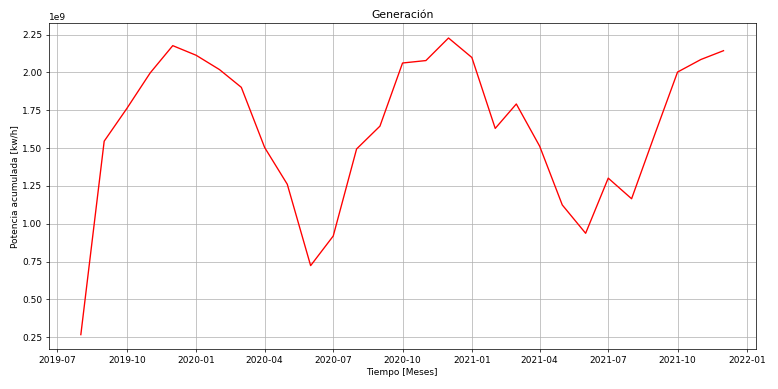

In [28]:
#falta modificar la data de entrada para que se grafique por hora
x_m, y_m_a = func.get_monthly_axes_from_modelChain_object(mc_A,'System_A')
_, y_m_b = func.get_monthly_axes_from_modelChain_object(mc_B,'System_B')
_, y_m_c = func.get_monthly_axes_from_modelChain_object(mc_C,'System_C')


y_m = [a+b+c for a,b,c in zip(y_m_a,y_m_b,y_m_c)]

func.plot_1(x=x_m,
          y=y_m,
          size=(12,6),
          save='si',
          name_file='TRICAHUE_II_meses',
          color='red',
          title='Generación',
          x_label='Tiempo [Meses]',
          y_label='Potencia acumulada [kw/h]')

In [ ]:
textos_modulos = ['JA','320',''] # tienen que ser 3 textos
textos_inversores = ['SMA','3000',''] # tiene que ser 3 textos
c = func.buscador(textos_inversores,textos_modulos)

for a in c:
    print(a,":\n")
    for i in c[a]:
        print(i)

In [ ]:
pvlib.pvsystem.retrieve_sam('cecMod').JA_Solar_JAP72S01_320_SC


In [ ]:
pvlib.pvsystem.retrieve_sam('sandiainverter').SMA_America__SWR1800U__120V_
pvlib.pvsystem.retrieve_sam('sandiainverter').SMA_America__SB2000HFUS_30__240V_
pvlib.pvsystem.retrieve_sam('sandiainverter').SMA_America__SB3000HFUS_30__240V_


